4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 68s 35ms/step - loss: 0.4982 - accuracy: 0.8175 - val_loss: 0.3607 - val_accuracy: 0.8691
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3231 - accuracy: 0.8831 - val_loss: 0.3111 - val_accuracy: 0.8890
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2768 - accuracy: 0.8996 - val_loss: 0.2845 - val_accuracy: 0.8973
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2466 - accuracy: 0.9100 - val_loss: 0.2848 - val_accuracy: 0.8974
Epoch 5/5
1/1 [==============================] - 0s 74ms/step


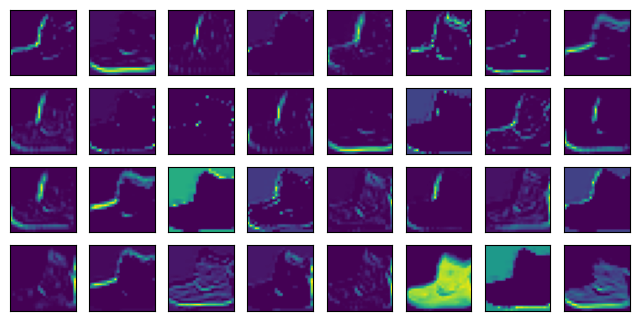

1/1 [==============================] - 0s 59ms/step


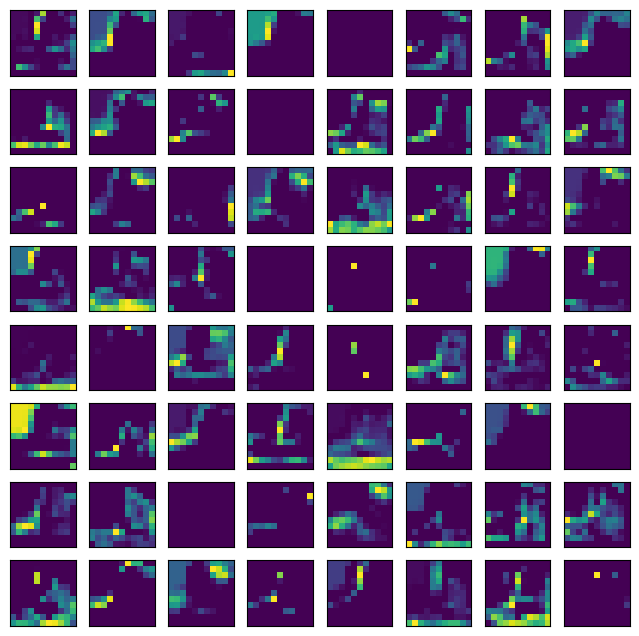

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN 모델 생성
model = models.Sequential([
    # 합성곱 레이어 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 합성곱 레이어 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 합성곱 레이어 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # 완전 연결 레이어
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5,
                    validation_data=(test_images[..., np.newaxis], test_labels))

# 합성곱 및 풀링 레이어의 특징 시각화
def visualize_layer_activation(layer_name, img_index):
    layer_output = model.get_layer(layer_name).output
    activation_model = models.Model(inputs=model.input, outputs=layer_output)

    img = train_images[img_index].reshape(1, 28, 28, 1)
    activations = activation_model.predict(img)

    plt.figure(figsize=(8, 8))
    for i in range(activations.shape[-1]):
        plt.subplot(8, 8, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[0, :, :, i], cmap='viridis')

    plt.show()

# 합성곱 레이어 1의 활성화 시각화
visualize_layer_activation('conv2d', 0)

# 합성곱 레이어 2의 활성화 시각화
visualize_layer_activation('conv2d_1', 0)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 68s 35ms/step - loss: 0.4982 - accuracy: 0.8175 - val_loss: 0.3607 - val_accuracy: 0.8691
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3231 - accuracy: 0.8831 - val_loss: 0.3111 - val_accuracy: 0.8890
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2768 - accuracy: 0.8996 - val_loss: 0.2845 - val_accuracy: 0.8973
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2466 - accuracy: 0.9100 - val_loss: 0.2848 - val_accuracy: 0.8974
Epoch 5/5
1/1 [==============================] - 0s 74ms/step


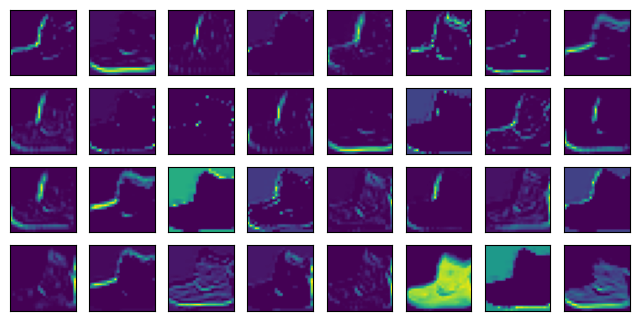

1/1 [==============================] - 0s 59ms/step


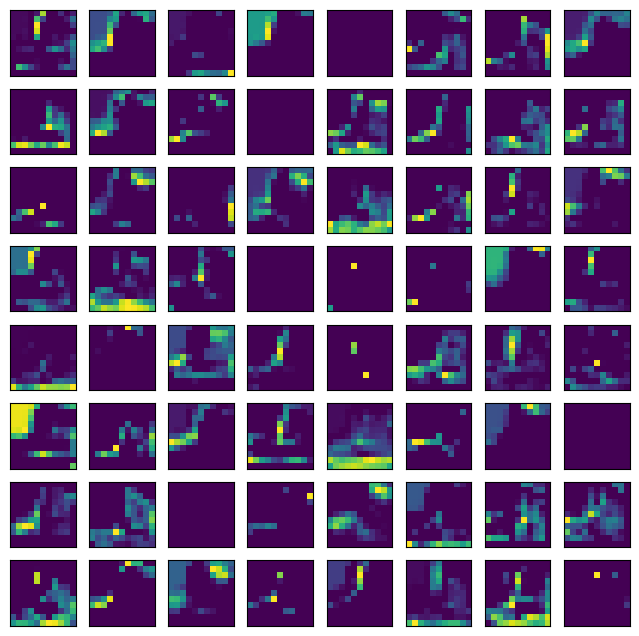

In [ ]:
import tensorflow as tf
from keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN 모델 생성
model = models.Sequential([
    # 합성곱 레이어 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 합성곱 레이어 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 합성곱 레이어 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # 완전 연결 레이어
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5,
                    validation_data=(test_images[..., np.newaxis], test_labels))

# 합성곱 및 풀링 레이어의 특징 시각화
def visualize_layer_activation(layer_name, img_index):
    layer_output = model.get_layer(layer_name).output
    activation_model = models.Model(inputs=model.input, outputs=layer_output)

    img = train_images[img_index].reshape(1, 28, 28, 1)
    activations = activation_model.predict(img)

    plt.figure(figsize=(8, 8))
    for i in range(activations.shape[-1]):
        plt.subplot(8, 8, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[0, :, :, i], cmap='viridis')

    plt.show()

# 합성곱 레이어 1의 활성화 시각화
visualize_layer_activation('conv2d', 0)

# 합성곱 레이어 2의 활성화 시각화
visualize_layer_activation('conv2d_1', 0)

### CNN

In [1]:
# TensorFlow와 Keras를 임포트합니다
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.datasets import fashion_mnist

# - TensorFlow는 딥러닝을 위한 라이브러리로, 모델을 구축하고 학습하는 데 사용됩니다.
# - Keras는 딥러닝 모델을 쉽게 구축하고 관리하기 위한 고수준 인터페이스를 제공합니다.
# - Sequential 모델은 레이어를 선형으로 쌓아가는 간단한 딥러닝 모델을 만들 때 사용됩니다.
# - Dense, Conv2D, Flatten, MaxPooling2D, Dropout 등은 다양한 유형의 레이어를 정의하기 위한 도구입니다.
# - fashion_mnist 데이터셋은 의류 이미지 분류를 위한 데이터셋으로, 딥러닝 모델을 학습하기 위한 데이터를 제공합니다.

In [2]:
# Fashion MNIST 데이터셋을 로드합니다
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# - fashion_mnist.load_data() 함수를 사용하여 Fashion MNIST 데이터셋을 로드합니다.
# - 이 데이터셋은 의류와 패션 관련 이미지와 해당 레이블(옷 종류)로 구성되어 있습니다.
# - train_images와 test_images는 훈련 및 테스트 이미지 데이터를 저장하고, train_labels와 test_labels는 해당 이미지의 레이블을 저장합니다.
# - 훈련 데이터(train)는 모델을 학습하는 데 사용하고, 테스트 데이터(test)는 모델의 성능을 평가하는 데 사용됩니다.

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# 이미지의 차원을 조정합니다 (컨볼루션 층에 맞게)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# - 컨볼루션 층(Conv2D)에 입력되는 이미지의 형태를 맞추기 위해 차원을 조정합니다.
# - reshape() 함수를 사용하여 이미지의 형태를 (이미지 수, 높이, 너비, 채널)로 변경합니다.
# - 여기서 채널은 흑백 이미지인 경우 1, 컬러 이미지인 경우 3으로 설정됩니다.

# 이미지를 정규화합니다 (0과 1 사이의 값으로)
train_images, test_images = train_images / 255.0, test_images / 255.0

# - 이미지의 픽셀 값을 0과 1 사이의 값으로 정규화합니다.
# - 이것은 모델이 이미지의 픽셀 값을 이해하기 쉽게 만들어주고 학습을 안정화시킵니다.
# - 정규화는 각 픽셀 값을 255로 나누어서 수행합니다.

In [4]:
# 모델을 구축합니다
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 첫 번째 컨볼루션 층
    MaxPooling2D((2, 2)),                                            # 첫 번째 풀링 층
    Conv2D(64, (3, 3), activation='relu'),                           # 두 번째 컨볼루션 층
    MaxPooling2D((2, 2)),                                            # 두 번째 풀링 층
    Flatten(),                                                       # Flatten 층
    Dense(64, activation='relu'),                                    # Dense 층
    Dense(10, activation='softmax')                                  # 출력 층
])

# - 모델을 Sequential 모델로 구축합니다. Sequential 모델은 레이어를 선형으로 쌓아가는 간단한 딥러닝 모델을 만들 때 사용됩니다.
# - Conv2D는 컨볼루션(합성곱) 층을 정의하는 레이어로, 이미지의 특징을 추출합니다.
# - MaxPooling2D는 최대 풀링 층을 정의하는 레이어로, 이미지의 크기를 줄이고 중요한 정보를 강조합니다.
# - Flatten은 이미지를 1차원 배열로 평탄화하는 레이어로, 모델의 입력 형태를 맞추기 위해 사용됩니다.
# - Dense는 완전 연결 레이어로, 신경망의 중간과 출력 층을 정의합니다.
# - activation 매개 변수는 각 레이어의 활성화 함수를 설정하며, 'relu'는 Rectified Linear Unit 함수를 의미하고, 'softmax'는 다중 클래스 분류를 위한 활성화 함수입니다.

In [5]:
# 모델 컴파일
model.compile(
    optimizer='adam',  # 옵티마이저: 'adam'은 효율적인 학습을 위한 알고리즘입니다.
    loss='sparse_categorical_crossentropy',  # 손실 함수: 다중 클래스 분류 문제에 사용되는 손실 함수입니다.
    metrics=['accuracy']  # 평가 지표: 정확도를 모델의 평가 지표로 사용합니다.
)

In [6]:
# 모델 학습
model.fit(
    train_images,                    # 훈련 이미지 데이터
    train_labels,                    # 훈련 레이블 데이터
    epochs=10,                       # 에폭 수: 전체 데이터셋을 몇 번 반복해서 학습할지 설정
    validation_data=(test_images, test_labels)  # 검증 데이터: 모델의 성능을 평가하기 위한 데이터
)

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4725 - accuracy: 0.8296 - val_loss: 0.3771 - val_accuracy: 0.8655
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3254 - accuracy: 0.8819 - val_loss: 0.3187 - val_accuracy: 0.8879
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2779 - accuracy: 0.8976 - val_loss: 0.3125 - val_accuracy: 0.8840
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2443 - accuracy: 0.9100 - val_loss: 0.2753 - val_accuracy: 0.9021
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2197 - accuracy: 0.9192 - val_loss: 0.2696 - val_accuracy: 0.9023
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1984 - accuracy: 0.9262 - val_loss: 0.2810 - val_accuracy: 0.9006
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1805 - accuracy: 0.9322 - val_loss: 0.2573 - val_accura

In [7]:
# 모델의 요약을 출력합니다
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [8]:
# 모델을 평가합니다
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# 테스트 정확도를 출력합니다
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2787 - accuracy: 0.9069 - 637ms/epoch - 2ms/step

Test accuracy: 0.9068999886512756
